# Load Dataset


In [171]:
#Atikah Salsabila
import pandas as pd
#Load Dataset
url='https://drive.google.com/file/d/1txCpCOjlqU4D1oWhzrKxGZQn98rtt1oO/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url)

#dataset= pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Preprocessing

In [172]:
#visualisasi data
!pip install matplotlib
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [173]:
dataset.shape

(96453, 12)

In [174]:
dataset[['Precip Type','Temperature (C)']].groupby('Precip Type').agg('min')

,Temperature (C)
Precip Type,
rain,0.005556
snow,-21.822222


In [175]:
dataset[['Precip Type','Temperature (C)']].groupby('Precip Type').agg('max')

,Temperature (C)
Precip Type,
rain,39.905556
snow,0.000000


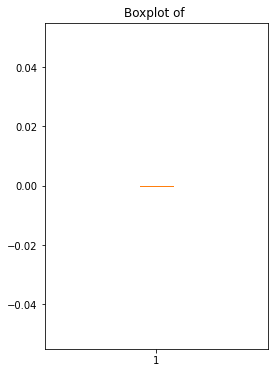

In [176]:
plt.figure(figsize = (4,6))
plt.boxplot(dataset['Loud Cover'])
plt.title("Boxplot of ")
plt.show()
#plt.boxplot?

In [177]:
#karena ternyata loud cover 0 semua, jadi hapus aja
dataset=dataset.drop('Loud Cover', axis=1)

In [178]:
dataset[['Summary', 'Temperature (C)']].groupby('Summary').agg("median")

,Temperature (C)
Summary,
Breezy,4.975000
Breezy and Dry,21.111111
Breezy and Foggy,-2.172222
Breezy and Mostly Cloudy,10.475000
Breezy and Overcast,7.777778
Breezy and Partly Cloudy,10.669444
Clear,12.222222
Dangerously Windy and Partly Cloudy,8.944444
Drizzle,10.994444


In [179]:
#disimpulkan snow ketika temperature<=0 dan rain ketika temperature>0 celcius
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm') 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [180]:
def grouping(pt):
  if pt=='rain':
    return 1
  else:
    return 0

dataset['cat_precip type']= dataset['Precip Type'].apply(lambda x: grouping(x))
dataset[['Precip Type','cat_precip type']]#.groupby('Precip Type').agg("count")

,Precip Type,cat_precip type
0,rain,1
1,rain,1
2,rain,1
3,rain,1
4,rain,1
...,...,...
96448,rain,1
96449,rain,1
96450,rain,1
96451,rain,1


In [181]:
#cek missing data
print(dataset.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
cat_precip type               0
dtype: int64


In [182]:
#Handle Missing Data , dengan kesimpulan sebelumnya snow ketika temperature<=0 dan rain ketika temperature>0 celcius
c1 = (dataset['Temperature (C)'] > 0)
dataset.loc[c1,'Precip Type'] = dataset.loc[c1,'Precip Type'].fillna('rain')
print(dataset.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
cat_precip type             0
dtype: int64


In [183]:
#ternyata sudah 0 berarti semua missing data terisi rain
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
 11  cat_precip type           96453 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 8.8+ MB


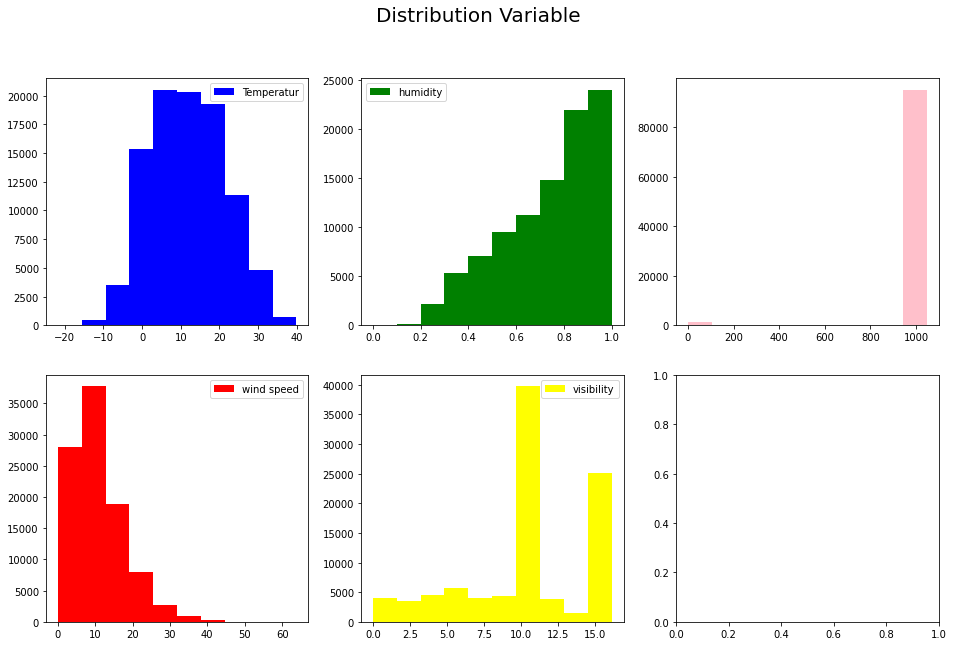

In [184]:
# multiple Distribution
fig, ax = plt.subplots(2,3, figsize = (16,10))

fig.suptitle('Distribution Variable', fontsize=20)
ax[0][0].hist(dataset['Temperature (C)'], label = 'Temperatur', color = 'blue')
ax[0][1].hist(dataset['Humidity'], label = 'humidity', color = 'green')
ax[1][0].hist(dataset['Wind Speed (km/h)'], label = 'wind speed', color = 'red')
ax[1][1].hist(dataset['Visibility (km)'], label = 'visibility', color = 'yellow')
ax[0][2].hist(dataset['Pressure (millibars)'], label = 'pressure', color = 'pink')

# Legend
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

#Show
plt.show()

In [185]:
#normalisasi data dengan standard scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#normalize
dataset['Humidity']= StandardScaler().fit_transform(dataset['Humidity'].values.reshape(-1,1))
dataset['Wind Speed (km/h)'] = MinMaxScaler().fit_transform(dataset['Wind Speed (km/h)'].values.reshape(-1,1))
#encode sementara tidak perlu

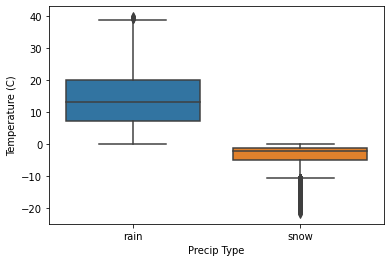

In [186]:
import seaborn as sns
sns.boxplot(x='Precip Type', y='Temperature (C)', data=dataset)

In [187]:
#menghapus kolom data yang bukan numerik
dataset = dataset.drop('Formatted Date', axis=1)
dataset = dataset.drop('Summary', axis=1)
dataset = dataset.drop('Precip Type', axis=1)
dataset = dataset.drop('Daily Summary', axis=1)
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),cat_precip type
0,9.472222,7.388889,0.793470,0.221130,251.0,15.8263,1015.13,1
1,9.355556,7.227778,0.639996,0.223399,259.0,15.8263,1015.63,1
2,9.377778,9.377778,0.793470,0.061523,204.0,14.9569,1015.94,1
3,8.288889,5.944444,0.486521,0.220877,269.0,15.8263,1016.41,1
4,8.755556,6.977778,0.486521,0.172970,259.0,15.8263,1016.51,1


# Splitting Data

---



In [188]:
x = dataset.drop("cat_precip type", axis=1).values
y = dataset['cat_precip type'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [189]:
x_train

array([[ 7.86666667e+00,  6.58888889e+00, -1.30401962e+00, ...,
         1.00000000e+01,  9.98200000e+00,  1.02729000e+03],
       [ 2.27833333e+01,  2.27833333e+01, -1.04822815e+00, ...,
         2.10000000e+01,  1.12056000e+01,  1.01881000e+03],
       [ 1.22222222e-01, -4.44444444e+00,  9.46945309e-01, ...,
         9.00000000e+00,  1.89980000e+00,  1.00213000e+03],
       ...,
       [ 1.35777778e+01,  1.35777778e+01,  5.37678957e-01, ...,
         0.00000000e+00,  1.00303000e+01,  1.01472000e+03],
       [ 1.76388889e+01,  1.76388889e+01,  8.95787015e-01, ...,
         1.19000000e+02,  7.03570000e+00,  9.97880000e+02],
       [ 1.38333333e+01,  1.38333333e+01, -4.85486921e-01, ...,
         1.49000000e+02,  1.55526000e+01,  1.00277000e+03]])

# Logistic regression untuk solve classification problems


In [190]:
#menggunakan metode classification yakni logistic regression karena yang diprediksi antara 2 nilai yaitu rain or snow
from sklearn.linear_model import LogisticRegression

In [191]:
logmodel = LogisticRegression()

In [192]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [193]:
Predictions = logmodel.predict(x_test)

# Performance evaluation

In [194]:
from sklearn.metrics import confusion_matrix

In [195]:
confusion_matrix(y_test,Predictions)

array([[ 3048,   305],
       [  155, 25428]])

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
accuracy_score(y_test, Predictions)

0.9841028476638097

Hasil Evaluasi: dari matriks, terlihat yang bernilai true(positive maupun negative) jauh lebih banyak dari pada yang bernilai false(positive maupun negative), hal ini menandakan prediksi bagus, kemudian didukung oleh accuracy score sebesar 0,984 maka bisa dikatakan model prediksi baik/sangat baik